In [0]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report







In [43]:
    #load cifar10 dataset
	(trainData, trainLabels), (testData, testLabels) = cifar10.load_data()
	labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
	numPfSamples,imgWidth,imgHeight,numOfchannels=trainData.shape
	print("[INFO] Original cifar10 dataset of trainData shape {}".format(trainData.shape))
	print("[INFO] Original cifar10 dataset of trainLabels shape {}".format(trainLabels.shape))
	print("[INFO] Original cifar10 dataset of testData shape {}".format(testData.shape))
	print("[INFO] Original cifar10 dataset of testLabels shape {}".format(testLabels.shape))
	print("[INFO] labels in cifar10 are {}".format(labels)) 

[INFO] Original cifar10 dataset of trainData shape (50000, 32, 32, 3)
[INFO] Original cifar10 dataset of trainLabels shape (50000, 1)
[INFO] Original cifar10 dataset of testData shape (10000, 32, 32, 3)
[INFO] Original cifar10 dataset of testLabels shape (10000, 1)
[INFO] labels in cifar10 are ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [32]:
    #get data ready for training
	trainX = trainData.reshape((trainData.shape[0], imgWidth,imgHeight,  numOfchannels))
	testX = testData.reshape((testData.shape[0], imgWidth,imgHeight, numOfchannels))
	trainX = trainX.astype("float32") / 255.0
	testX = testX.astype("float32") / 255.0
	trainLabels=trainLabels.astype(str)
	testLabels=testLabels.astype(str)
	lb = LabelBinarizer()
	trainY = lb.fit_transform(trainLabels)
	testY = lb.fit_transform(testLabels)
	print("[INFO] Data ready for training")

[INFO] Data ready for training


In [0]:
	#tuning parameters
	weight_decay = 1e-4
	INIT_LR = 1e-3
	EPOCHS=25
	BS=32

In [34]:
	#define model
	model = tf.keras.models.Sequential()
	model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32,32,3)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.2))	 
	model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.3))	 
	model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
	model.add(tf.keras.layers.Activation('elu'))
	model.add(tf.keras.layers.BatchNormalization())
	model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
	model.add(tf.keras.layers.Dropout(0.4))
	model.add(tf.keras.layers.Flatten())
	model.add(tf.keras.layers.Dense(10, activation="softmax"))
	model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)       

In [35]:
    #compile model
	opt = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
	model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
	print("[INFO] Model compiled")

[INFO] Model compiled


In [36]:
	# train the network
	print("[INFO] training network...")
	aug = ImageDataGenerator()
	history = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS, verbose=1)
	model.save("cifar10model.keras2")
	print("[INFO] Model saved to {}".format("cifar10model.keras2"))

[INFO] training network...
Epoch 1/25
1562/1562 [==============================] - 49s 32ms/step - loss: 1.6504 - acc: 0.4926 - val_loss: 1.0619 - val_acc: 0.6531
Epoch 2/25
1562/1562 [==============================] - 47s 30ms/step - loss: 1.0408 - acc: 0.6623 - val_loss: 1.2492 - val_acc: 0.6216
Epoch 3/25
1562/1562 [==============================] - 47s 30ms/step - loss: 0.8832 - acc: 0.7171 - val_loss: 0.8236 - val_acc: 0.7492
Epoch 4/25
1562/1562 [==============================] - 47s 30ms/step - loss: 0.7943 - acc: 0.7554 - val_loss: 0.8347 - val_acc: 0.7438
Epoch 5/25
1562/1562 [==============================] - 47s 30ms/step - loss: 0.7312 - acc: 0.7797 - val_loss: 0.7539 - val_acc: 0.7723
Epoch 6/25
1562/1562 [==============================] - 47s 30ms/step - loss: 0.6830 - acc: 0.8008 - val_loss: 0.6877 - val_acc: 0.8027
Epoch 7/25
1562/1562 [==============================] - 47s 30ms/step - loss: 0.6426 - acc: 0.8159 - val_loss: 0.7381 - val_acc: 0.7959
Epoch 8/25
1562/1562 

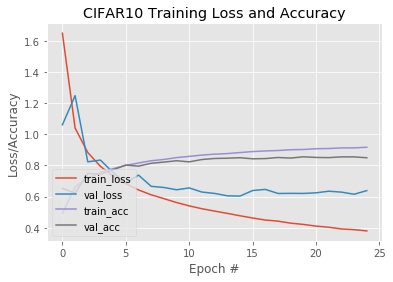

In [37]:
	#draw training curves	
	acc      = history.history[     'acc' ]
	val_acc  = history.history[ 'val_acc' ]
	loss     = history.history[    'loss' ]
	val_loss = history.history['val_loss' ]   
	epochs   = range(len(acc)) # Get number of epochs
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(epochs, loss, label="train_loss")
	plt.plot(epochs, val_loss, label="val_loss")
	plt.plot(epochs, acc, label="train_acc")
	plt.plot(epochs, val_acc, label="val_acc")
	plt.title("CIFAR10 Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")
	plt.show()

In [40]:
	# evaluate the network
	print("[INFO] evaluating network...")
	predictions = model.predict(testX, batch_size=32)
	y_true=testY.argmax(axis=1)
	y_pred=predictions.argmax(axis=1)
	print(classification_report(y_true,y_pred, target_names=labels))
	print(confusion_matrix(y_true, y_pred))
	print(labels)

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.86      0.86      0.86      1000
  automobile       0.96      0.90      0.93      1000
        bird       0.82      0.75      0.79      1000
         cat       0.77      0.70      0.73      1000
        deer       0.81      0.89      0.85      1000
         dog       0.83      0.74      0.78      1000
        frog       0.80      0.93      0.86      1000
       horse       0.91      0.86      0.89      1000
        ship       0.89      0.93      0.91      1000
       truck       0.87      0.93      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

[[856   5  36   9   9   1  14   2  43  25]
 [  8 902   1   5   1   1   5   0  14  63]
 [ 42   1 752  24  56  32  65  15   6   7]
 [ 18   1  36 702  47  80  73  15  14  14]
 [  6   2  21  23 888   9  23  21   6   